<a href="https://colab.research.google.com/github/iyashk/Lasso-and-Ridge-using-ADMM/blob/main/src/Lasso_Ridge_maths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study of Lasso and Ridge using ADMM and other algorithms.

In [1]:
import pandas as pd
data1 = pd.read_csv(r'Dataset of Diabetes .csv')

In [2]:
data1.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


DATASET MANIPULATION

In [3]:
final_Dataset = data1.copy()
final_Dataset['Sugar_Level'] = data1['HbA1c']
final_Dataset.drop(['ID'],axis=1,inplace=True)
final_Dataset.drop(['No_Pation'],axis=1,inplace=True)
final_Dataset.drop(['CLASS'],axis=1,inplace=True)
final_Dataset=pd.get_dummies(final_Dataset,drop_first=True)
final_Dataset.drop(['Gender_f'],axis=1,inplace=True)
final_Dataset['CLASS'] =data1['CLASS']
final_Dataset.drop(['HbA1c'],axis=1,inplace=True)

In [4]:
final_Dataset.head()

,AGE,Urea,Cr,Chol,TG,HDL,LDL,VLDL,BMI,Sugar_Level,Gender_M,CLASS
0,50,4.7,46,4.2,0.9,2.4,1.4,0.5,24.0,4.9,0,N
1,26,4.5,62,3.7,1.4,1.1,2.1,0.6,23.0,4.9,1,N
2,50,4.7,46,4.2,0.9,2.4,1.4,0.5,24.0,4.9,0,N
3,50,4.7,46,4.2,0.9,2.4,1.4,0.5,24.0,4.9,0,N
4,33,7.1,46,4.9,1.0,0.8,2.0,0.4,21.0,4.9,1,N


In [5]:
final_Dataset.columns

Index(['AGE', 'Urea', 'Cr', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI',
       'Sugar_Level', 'Gender_M', 'CLASS'],
      dtype='object')

factors that may contribute to "Sugar_Level"

In [6]:
factors = [
 'AGE',
 'Urea',
 'Cr',
 'Chol',
 'TG',
 'HDL',
 'LDL',
 'VLDL',
 'BMI'
 ]

CORRELATION FOR FINAL DATASET

In [7]:
final_Dataset.corr(method ='pearson')

,AGE,Urea,Cr,Chol,TG,HDL,LDL,VLDL,BMI,Sugar_Level,Gender_M
AGE,1.000000,0.105092,0.054941,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.379136,0.021486
Urea,0.105092,1.000000,0.624134,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,-0.023603,0.116311
Cr,0.054941,0.624134,1.000000,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,-0.037412,0.154870
Chol,0.036649,0.001852,-0.007097,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,0.177489,-0.064763
TG,0.148204,0.040980,0.056579,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.218556,0.052111
HDL,-0.020038,-0.036994,-0.023804,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,0.028933,-0.130130
LDL,0.016105,-0.007301,0.039479,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322,0.011057,0.054563
VLDL,-0.087903,-0.011191,0.009615,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133,0.073462,0.194120
BMI,0.375956,0.045618,0.054746,0.013678,0.110757,0.072409,-0.067322,0.198133,1.000000,0.413350,0.072097
Sugar_Level,0.379136,-0.023603,-0.037412,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,1.000000,-0.009362


In [8]:
final_Dataset[factors].head()

,AGE,Urea,Cr,Chol,TG,HDL,LDL,VLDL,BMI
0,50,4.7,46,4.2,0.9,2.4,1.4,0.5,24.0
1,26,4.5,62,3.7,1.4,1.1,2.1,0.6,23.0
2,50,4.7,46,4.2,0.9,2.4,1.4,0.5,24.0
3,50,4.7,46,4.2,0.9,2.4,1.4,0.5,24.0
4,33,7.1,46,4.9,1.0,0.8,2.0,0.4,21.0


LASSO USING ADMM

iter     r norm    eps pri     s norm   eps dual  objective     time
  0     0.1997     0.0029     0.0768     0.0021    2222.27    0.000345
  1     0.0000     0.0029     0.1997     0.0021    2222.31    0.000196
  2     0.0000     0.0029     0.0000     0.0021    2222.31    0.000137


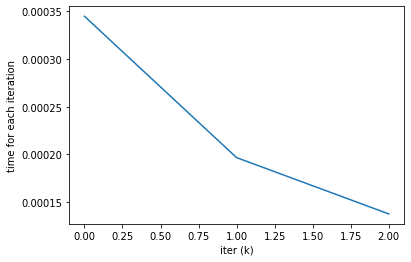

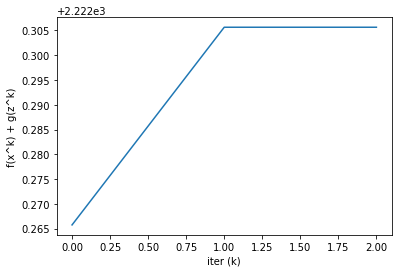

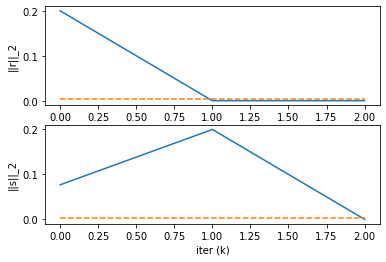

Estimated coefficients are:[('BMI', 0.2765)]
Std Error is:0.0947
RMSE is:2.2249
MAE is:1.7889


In [9]:
import numpy as np
from numpy import linalg as la
from scipy import sparse
from scipy import stats
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
from numpy.linalg import norm,cholesky
from sklearn.metrics import mean_squared_error,mean_absolute_error
import time as t

class History1:
    def __init__(self):
        self.objval = []
        self.r_norm = []
        self.s_norm = []
        self.eps_pri = []
        self.eps_dual = []
        self.time_iter = []

    def addtime_iter(self, time_iter):
        self.time_iter.append(time_iter)

    def gettime_iter(self):
        return self.time_iter

    def settime_iter(self,time_iter):
      self.time_iter=time_iter

    def addObjval(self, objval):
        self.objval.append(objval)

    def getObjval(self):
        return self.objval

    def addR_norm(self, r_norm):
        self.r_norm.append(r_norm)

    def getR_norm(self):
        return self.r_norm

    def addS_norm(self, s_norm):
        self.s_norm.append(s_norm)

    def getS_norm(self):
        return self.s_norm

    def addEps_pri(self, eps_pri):
        self.eps_pri.append(eps_pri)

    def getEps_pri(self):
        return self.eps_pri

    def addEps_dual(self, eps_dual):
        self.eps_dual.append(eps_dual)

    def getEps_dual(self):
        return self.eps_dual

    

def objective(A, b, lamda, x, z):
    a = np.dot(A, x) - b
    p = 1/2*((la.norm(a, 2))**2) + lamda*la.norm(z, 1)
    return p

def shrinkage(x, kappa):
    z = np.maximum(0, (x - kappa).getA()) - np.maximum(0, (-x - kappa).getA())
    #print(x,kappa)
    return z


def Standard_error1(sample):
    std = np.std(sample,ddof=0) #standard deviation
    standard_error = std/math.sqrt(len(sample))
    return standard_error

  
# Solves the following problem via ADMM:
# minimize 1/2*|| Ax - b ||_2^2 + \lambda || x ||_1

def lasso(A, b, lamda, rho, alpha):
    QUIET = False
    MAX_ITER = 100
    ABSTOL = 10**(-4)
    RELTOL = 10**(-2)

    m, n = A.shape
    # save a matrix-vector multiply
    Atb = A.T*b
   
    #print(Atb.shape)
    # ADMM solver
    x = np.zeros([n, 1])
    z = np.zeros([n, 1])
    u = np.zeros([n, 1])

    h = {}
    h['objval']     = np.zeros(MAX_ITER)
    h['r_norm']     = np.zeros(MAX_ITER)
    h['s_norm']     = np.zeros(MAX_ITER)
    h['eps_pri']    = np.zeros(MAX_ITER)
    h['eps_dual']   = np.zeros(MAX_ITER)
    h['x'] = np.zeros(MAX_ITER)

    # cache the factorization
    L, U = factor(A, rho)
    #decomposing the (AT.A - rho*I) into L,U  
    
    history = History1()
    for k in range(0, MAX_ITER):
        # x-update
        start_time = t.time()
        q = Atb + rho*(z) - (u/rho)  # temporary value
        #as x - update is xk = (AT.A - rho*I)^(-1)*(AT*b+rho*z-u/rho)
        if m >= n:
            x = la.solve(U.todense(), la.solve(L.todense(), q))
        else:
            x = q/rho - np.dot(A.T, la.solve(U.todense(), la.solve(L.todense(), np.dot(A, q))))/rho**2
        ##print(x,z)
        # z-update
        zold = z
        x_hat = x #alpha*x + (1 - alpha)*zold
        z = shrinkage(x_hat + u/rho, lamda/rho)
        #print(z,zold,lamda)
        #print(z)
        # u-update
        u = u + rho*(x_hat - z)
        time= t.time() - start_time
        # diagnostics, reporting, termination checks
        history.addObjval(objective(A, b, lamda, x, z))
        h['objval'][k] = objective(A, b, lamda, x, z)
        history.addR_norm(la.norm(x - z))
        h['r_norm'][k]   = norm(x-z)
        history.addS_norm(la.norm(-rho*(z-zold)))
        h['s_norm'][k]   = norm(-rho*(z-zold))
        history.addEps_pri(np.sqrt(n)*ABSTOL + RELTOL*np.maximum(la.norm(x), la.norm(-z)))
        h['eps_pri'][k]  = np.sqrt(n)*ABSTOL+ RELTOL*np.maximum(norm(x),norm(-z))
        history.addEps_dual(np.sqrt(n)*ABSTOL + RELTOL*la.norm(rho*u))
        h['eps_dual'][k] = np.sqrt(n)*ABSTOL+ RELTOL*norm(rho*u)
        history.addtime_iter(time)

        if history.getR_norm()[k] < history.getEps_pri()[k] and history.getS_norm()[k]<history.getEps_dual()[k]:
            break
    time = list(history.gettime_iter())
    time_iter = time.copy()
    time_iter.sort(reverse=True)
    history.settime_iter(time_iter)
    
    return x.ravel(), history ,h        

def factor(A, rho):
    m, n = A.shape
    if m >= n:
        L = la.cholesky(np.dot(A.T, A) + rho*sparse.eye(n))
    else:
        L = la.cholesky(sparse.eye(m) + 1/rho*(np.dot(A, A.T)))

    L = sparse.coo_matrix(L)
    U = sparse.coo_matrix(L.T)

    return L, U

factors = [
 'BMI'
 ]

A = (final_Dataset [factors])
b = (final_Dataset['Sugar_Level'])
X_train, X_test, y_train, y_test = train_test_split(A, b,test_size=0.2, random_state=1)
A = np.matrix(X_train)
b = np.matrix(y_train).T
lambda_max = la.norm(np.dot(A.T, b), np.inf)

lamda = 0.000001*lambda_max

# Solve problem
x, history ,h = lasso(A, b, lamda, 1.0, 1.0)
y_test_predict=X_test.dot(x[0].T)
print('%3s' % 'iter', '%10s' % 'r norm', '%10s' % 'eps pri', '%10s' % 's norm', '%10s' % 'eps dual', '%10s' % 'objective','%8s' % 'time')
for k in range(len(history.getObjval())):
  print('%3d' % k, '%10.4f' % history.getR_norm()[k], '%10.4f' % history.getEps_pri()[k], '%10.4f' % history.getS_norm()[k],
                  '%10.4f' % history.getEps_dual()[k], '%10.2f' % history.getObjval()[k],'%11.6f' % history.gettime_iter()[k])
  
coef = []
for i in range(len(factors)):
    coef.append((factors[i],round(float(x.T[i][0]),4)))
  
# Reporting
K = len(history.gettime_iter())
x = np.arange(K)
plt.plot(x, history.gettime_iter())
plt.xlabel('iter (k)')
plt.ylabel('time for each iteration')
plt.show()

plt.plot(x, history.getObjval())
plt.xlabel('iter (k)')
plt.ylabel('f(x^k) + g(z^k)')
plt.show()

plt.subplot(211)
plt.plot(x, np.maximum(10**(-8), history.getR_norm()), '-', history.getEps_pri(), '--')
plt.ylabel('||r||_2')

plt.subplot(212)
plt.plot(x, np.maximum(10**(-8), history.getS_norm()), '-', history.getEps_dual(), '--')
plt.xlabel('iter (k)')
plt.ylabel('||s||_2')
plt.show()


# model evaluation (MSE,MAE,std_error)
rmse_predict = round(np.sqrt(mean_squared_error(y_test,y_test_predict)),4)
mae_predict = round(mean_absolute_error(y_test,y_test_predict),4)
std_error = round(float(Standard_error1(y_test_predict)),4)

print ('Estimated coefficients are:'+str(coef))
print ('Std Error is:'+str(std_error))
print ('RMSE is:'+str(rmse_predict))
print ('MAE is:'+str(mae_predict))

In [10]:
run_time = 0
for k in range(len(history.getObjval())):
  run_time += history.gettime_iter()[k]
print(round(run_time,5))

0.00068


Gradient descent LASSO

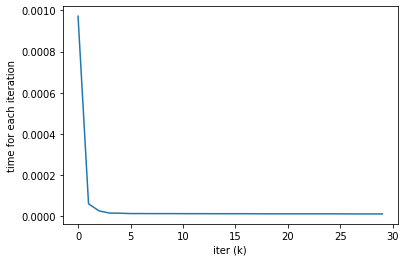

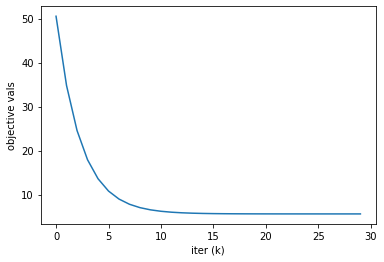

Std Error is:0.0945
RMSE is:2.2266
MAE is:1.7894


In [11]:
import numpy as np
import pandas as pd
import time as t
from sklearn.model_selection import train_test_split

  
# Lasso Regression
  
class LassoRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
        self.l1_penality = l1_penality

        self.time_iter_grad = []

        self.objval_grad = []
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.X = X
          
        self.Y = Y
        
        # gradient descent learning
                  
        for i in range( self.iterations ) :
            pred = self.predict( self.X )
            h1 = self.objval(Y, pred , X)
            start_time_grad = t.time()
            self.update_weights()
            time_grad = round(t.time()- start_time_grad,7)
            self.time_iter_grad.append(time_grad)
            pred = self.predict( self.X )
            h2 = self.objval(Y, pred , X)
            self.objval_grad.append(h2)
            if(abs(h2-h1)<=0.0001):
              break
        time_g = (self.time_iter_grad)
        time_iterg = time_g.copy()
        time_iterg.sort(reverse=True)
        self.time_iter_grad = time_iterg
        return self, self.time_iter_grad
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
          
        dW = np.zeros( self.n )
          
        for j in range( self.n ) :
              
            if self.W[j] > 0 :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         + self.l1_penality ) / self.m
          
            else :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         - self.l1_penality ) / self.m
  
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
        return X.dot( self.W ) 

    def objval(self ,Y,pred,X):
      h = (sum( (Y - pred )**2) + self.l1_penality*la.norm(self.W, 1) )/self.m
      return h

X_train_grad = np.asarray(X_train)
y_train_grad = np.asarray(y_train)
X_test_grad = np.asarray(X_test)
y_test_grad = np.asarray(y_test)
model = LassoRegression(iterations = 100, learning_rate = 0.001, l1_penality = 100 )
model , time_grad = model.fit(X_train_grad,y_train_grad)
K = len(time_grad)
x_vals = np.arange(K)
plt.plot(x_vals, time_grad)
plt.xlabel('iter (k)')
plt.ylabel('time for each iteration')
plt.show()

plt.plot(x_vals, model.objval_grad)
plt.xlabel('iter (k)')
plt.ylabel('objective vals')
plt.show()

y_pred_grad = model.predict(X_test_grad)

# model evaluation (MSE,MAE,std_error)
rmse_predict_grad = round(np.sqrt(mean_squared_error(y_test_grad,y_pred_grad)),4)
mae_predict_grad = round(mean_absolute_error(y_test_grad,y_pred_grad),4)
std_error_grad = round(float(Standard_error1(y_pred_grad)),4)

print ('Std Error is:'+str(std_error_grad))
print ('RMSE is:'+str(rmse_predict_grad))
print ('MAE is:'+str(mae_predict_grad))


In [12]:
K

30

In [13]:
run_time_grad = 0
for k in range(len(time_grad)):
  run_time_grad += time_grad[k]
print(round(run_time_grad,5))

0.00141


Sklearn LASSO

In [14]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=lamda)
sk_t= t.time() 
clf.fit(X_train,y_train)
sk_t = t.time() - sk_t
pred = clf.predict(X_test)


In [15]:
rmse_predict = round(np.sqrt(mean_squared_error(y_test,pred)),4)
mae_predict = round(mean_absolute_error(y_test,pred),4)
std_error = round(float(Standard_error1(pred)),4)
print('Total Time:',round(sk_t,5))
print ('Std Error is:'+str(std_error))
print ('RMSE is:'+str(rmse_predict))
print ('MAE is:'+str(mae_predict))

Total Time: 0.00445
Std Error is:0.0646
RMSE is:2.2546
MAE is:1.8407


Dist Plot

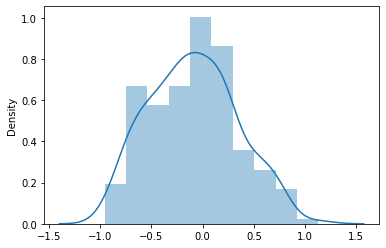

In [16]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.distplot((y_test_predict.T - pred))

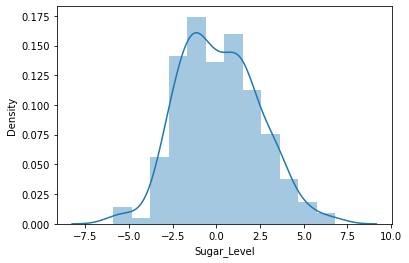

In [17]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot((y_test - pred))

LASSO FOR SCIKIT LEARN AND ADMM IMPLEMENTATIONS GRAPH PLOT

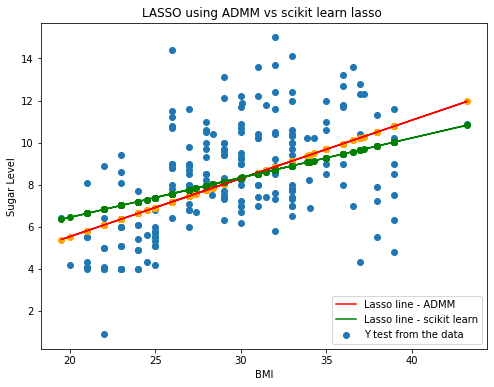

In [18]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.scatter(X_test,y_test , label='Y test from the data')
plt.scatter(X_test,y_test_predict,color='orange')
plt.plot(np.array(X_test),np.array(y_test_predict),color = 'red',label='Lasso line - ADMM')
plt.scatter(X_test,pred,color ='green')
plt.plot(np.array(X_test),np.array(pred),color = 'green',label='Lasso line - scikit learn')
plt.title('LASSO using ADMM vs scikit learn lasso ')
plt.xlabel('BMI')
plt.ylabel('Sugar Level')
plt.legend()
plt.show()


LASSO USING ADMM vs GRADIENT DESCENT

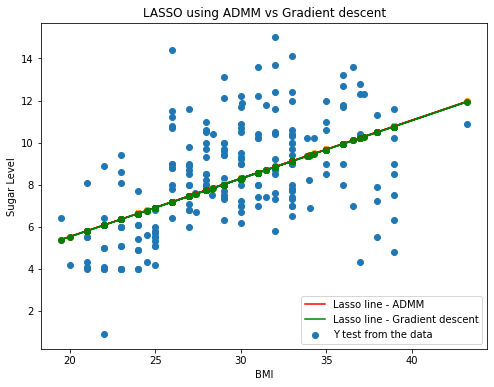

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.scatter(X_test,y_test , label='Y test from the data')
plt.scatter(X_test,y_test_predict,color='orange')
plt.plot(np.array(X_test),np.array(y_test_predict),color = 'red',label='Lasso line - ADMM')
plt.scatter(X_test, y_pred_grad,color='green')
plt.plot(np.array(X_test),np.array(y_pred_grad),color='green',label='Lasso line - Gradient descent')
plt.title('LASSO using ADMM vs Gradient descent')
plt.xlabel('BMI')
plt.ylabel('Sugar Level')
plt.legend()
plt.show()


Ridge using ADMM

(800, 1)
iter     r norm    eps pri     s norm   eps dual  objective     time
  0     0.0789     0.0029     0.1976     0.0009    2222.26    0.000142
  1     0.0225     0.0029     0.0564     0.0011    2222.26    0.000101
  2     0.0064     0.0029     0.0161     0.0012    2222.26    0.000098
  3     0.0018     0.0029     0.0046     0.0012    2222.27    0.000098
  4     0.0005     0.0029     0.0013     0.0012    2222.27    0.000089
  5     0.0001     0.0029     0.0004     0.0012    2222.27    0.000085


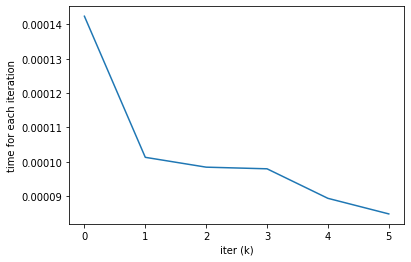

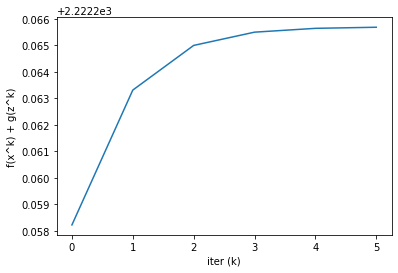

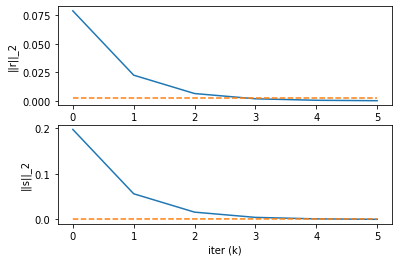

Estimated coefficients are:[('BMI', 0.2765)]
Std Error is:0.0947
RMSE is:2.2249
MAE is:1.7889


In [20]:
import numpy as np
from numpy import linalg as la
from scipy import sparse
from scipy import stats
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
from numpy.linalg import norm,cholesky
from sklearn.metrics import mean_squared_error,mean_absolute_error
import time as t
import warnings
warnings.filterwarnings("ignore")
class History1:
    def __init__(self):
        self.objval = []
        self.r_norm = []
        self.s_norm = []
        self.eps_pri = []
        self.eps_dual = []
        self.time_iter = []

    def addtime_iter(self, time_iter):
        self.time_iter.append(time_iter)

    def gettime_iter(self):
        return self.time_iter

    def settime_iter(self,time_iter):
      self.time_iter=time_iter    
    def addObjval(self, objval):
        self.objval.append(objval)

    def getObjval(self):
        return self.objval

    def addR_norm(self, r_norm):
        self.r_norm.append(r_norm)

    def getR_norm(self):
        return self.r_norm

    def addS_norm(self, s_norm):
        self.s_norm.append(s_norm)

    def getS_norm(self):
        return self.s_norm

    def addEps_pri(self, eps_pri):
        self.eps_pri.append(eps_pri)

    def getEps_pri(self):
        return self.eps_pri

    def addEps_dual(self, eps_dual):
        self.eps_dual.append(eps_dual)

    def getEps_dual(self):
        return self.eps_dual

def objective(A, b, lamda, x, z):
    a = np.dot(A, x) - b
    p = 1/2*((la.norm(a, 2))**2) + lamda*(la.norm(z, 2)**2)
    return p

def factor(A, rho):
    m, n = A.shape
    if m >= n:
        L = la.cholesky(np.dot(A.T, A) + rho*sparse.eye(n))
    else:
        L = la.cholesky(sparse.eye(m) + 1/rho*(np.dot(A, A.T)))

    L = sparse.coo_matrix(L)
    U = sparse.coo_matrix(L.T)

    return L, U

def Standard_error1(sample):
    std = np.std(sample,ddof=0) #standard deviation
    standard_error = std/math.sqrt(len(sample))
    return standard_error


  
# Solves the following problem via ADMM:
# minimize 1/2*|| Ax - b ||_2^2 + \lambda || x ||_2

def ridge(A, b, lamda, rho, alpha):
    QUIET = False
    MAX_ITER = 100
    ABSTOL = 10**(-4)
    RELTOL = 10**(-2)

    m, n = A.shape
    # save a matrix-vector multiply
    Atb = A.T*b
   
    #print(Atb.shape)
    # ADMM solver
    x = np.zeros([n, 1])
    z = np.zeros([n, 1])
    u = np.zeros([n, 1])

    h = {}
    h['objval']     = np.zeros(MAX_ITER)
    h['r_norm']     = np.zeros(MAX_ITER)
    h['s_norm']     = np.zeros(MAX_ITER)
    h['eps_pri']    = np.zeros(MAX_ITER)
    h['eps_dual']   = np.zeros(MAX_ITER)


    # cache the factorization
    L, U = factor(A, rho)
    #decomposing the (AT.A - rho*I) into L,U 

    history = History1()
    for k in range(0, MAX_ITER):
        # x-update
        start_time = t.time()
        q = Atb + rho*(z) - u  # temporary value
        #as x - update is xk = (AT.A - rho*I)^(-1)*(AT*b+rho*z-u)
        if m >= n:
            x = la.solve(U.todense(), la.solve(L.todense(), q))
        else:
            x = q/rho - np.dot(A.T, la.solve(U.todense(), la.solve(L.todense(), np.dot(A, q))))/rho**2
        ##print(x,z)
        # z-update
        zold = z
        x_hat = x #alpha*x + (1 - alpha)*zold
        z = (rho*x_hat + u)/(2*lamda + rho)
        #print(z,zold,lamda)
        #print(z)
        # u-update
        u = u + rho*(x_hat - z)
        time= t.time() - start_time
        # diagnostics, reporting, termination checks
        history.addObjval(objective(A, b, lamda, x, z))
        h['objval'][k] = objective(A, b, lamda, x, z)
        history.addR_norm(la.norm(x - z))
        h['r_norm'][k]   = norm(x-z)
        history.addS_norm(la.norm(-rho*(z-zold)))
        h['s_norm'][k]   = norm(-rho*(z-zold))
        history.addEps_pri(np.sqrt(n)*ABSTOL + RELTOL*np.maximum(la.norm(x), la.norm(-z)))
        h['eps_pri'][k]  = np.sqrt(n)*ABSTOL+ RELTOL*np.maximum(norm(x),norm(-z))
        history.addEps_dual(np.sqrt(n)*ABSTOL + RELTOL*la.norm(rho*u))
        h['eps_dual'][k] = np.sqrt(n)*ABSTOL+ RELTOL*norm(rho*u)
        history.addtime_iter(time)


        if history.getR_norm()[k] < history.getEps_pri()[k] and history.getS_norm()[k]<history.getEps_dual()[k]:
            break
    time = list(history.gettime_iter())
    time_iter = time.copy()
    time_iter.sort(reverse=True)
    history.settime_iter(time_iter)
    return x.ravel(), history ,h        
#
factors = [
 
 'BMI'
 ]

A1 = (final_Dataset [factors])
b1 = (final_Dataset['Sugar_Level'])

A1 = np.matrix(A1)
b1 = np.matrix(b1).T
X_train1, X_test1, y_train1, y_test1 = train_test_split(A1, b1,test_size=0.2, random_state=1)
print(X_train1.shape)
lambda_max1 = la.norm(np.dot(X_train1.T, y_train1), np.inf)
lamda1 = 0.000001*lambda_max1
# Solve problem
x1, history1 ,h1 = ridge(X_train1, y_train1, lamda1, 1.0, 1.0)

y_test_predict1=X_test1.dot(x1[0].T)

print('%3s' % 'iter', '%10s' % 'r norm', '%10s' % 'eps pri', '%10s' % 's norm', '%10s' % 'eps dual', '%10s' % 'objective','%8s' % 'time')
for k in range(len(history1.getObjval())):
  print('%3d' % k, '%10.4f' % history1.getR_norm()[k], '%10.4f' % history1.getEps_pri()[k], '%10.4f' % history1.getS_norm()[k],
                  '%10.4f' % history1.getEps_dual()[k], '%10.2f' % history1.getObjval()[k],'%11.6f' % history1.gettime_iter()[k])

coef = []
for i in range(len(factors)):
    coef.append((factors[i],round(float(x1.T[i][0]),4)))
  
# Reporting
K = len(history1.gettime_iter())
x1 = np.arange(K)
plt.plot(x1, history1.gettime_iter())
plt.xlabel('iter (k)')
plt.ylabel('time for each iteration')
plt.show()

plt.plot(x1, history1.getObjval())
plt.xlabel('iter (k)')
plt.ylabel('f(x^k) + g(z^k)')
plt.show()

plt.subplot(211)
plt.plot(x1, np.maximum(10**(-8), history1.getR_norm()), '-', history1.getEps_pri(), '--')
plt.ylabel('||r||_2')

plt.subplot(212)
plt.plot(x1, np.maximum(10**(-8), history1.getS_norm()), '-', history1.getEps_dual(), '--')
plt.xlabel('iter (k)')
plt.ylabel('||s||_2')
plt.show()

# model evaluation (MSE,MAE,std_error)
rmse_predict = round(np.sqrt(mean_squared_error(y_test1,y_test_predict1)),4)
mae_predict = round(mean_absolute_error(y_test1,y_test_predict1),4)
std_error = round(float(Standard_error1(y_test_predict1)),4)

print ('Estimated coefficients are:'+str(coef))
print ('Std Error is:'+str(std_error))
print ('RMSE is:'+str(rmse_predict))
print ('MAE is:'+str(mae_predict))

In [21]:
run_time = 0
for k in range(len(history1.getObjval())):
  run_time += history1.gettime_iter()[k]
print(round(run_time,5))

0.00061


GRADIENT DESCENT RIDGE

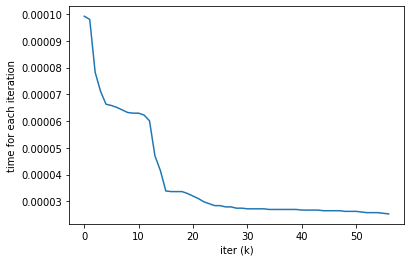

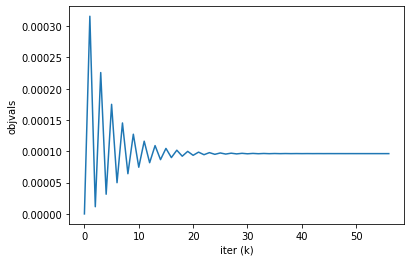

Std Error is:0.0959
RMSE is:2.4975
MAE is:2.0105


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time as t
# Ridge Regression
  
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
        self.timeiter = [] 
        self.objvals = []
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
            Y_pred = self.predict( self.X )
            hh = self.objval(Y,Y_pred,X)
            
            start = t.time()            
            self.update_weights()
            end = t.time() - start
            self.timeiter.append(end)
            Y_pred = self.predict( self.X )
            hj = self.objval(Y,Y_pred,X)
            self.objvals.append(hh)
            if(abs(hh-hj)<=0.0001e-05):
              break

        time_g1 = (self.timeiter)
        time_iterg1 = time_g1.copy()
        time_iterg1.sort(reverse=True)
        self.timeiter = time_iterg1
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
    
    def objval(self ,Y,pred,X):
      h_1 = sum( (Y - pred )**2)
      h_2 = la.norm( self.W,2 )**2
      h_3 = self.l2_penality*h_2
      h = h_3/self.m
      return h


Aaa = (final_Dataset[factors].iloc[::].values)
baa = (final_Dataset['Sugar_Level'].iloc[::].values)


X_train, X_test, y_train, y_test = train_test_split(Aaa, baa,test_size=0.2, random_state=3)

model = RidgeRegression(iterations = 100, learning_rate = 0.001, l2_penality = 1 )
model.fit(X_train,y_train)

Y_pred = model.predict(X_test)

K = len(model.timeiter)
x_vals1 = np.arange(K)
plt.plot(x_vals1, model.timeiter)
plt.xlabel('iter (k)')
plt.ylabel('time for each iteration')
plt.show()
plt.plot(x_vals1, model.objvals)
plt.xlabel('iter (k)')
plt.ylabel('objvals')
plt.show()

# model evaluation (MSE,MAE,std_error)
rmse_predict = round(np.sqrt(mean_squared_error(y_test,Y_pred)),4)
mae_predict = round(mean_absolute_error(y_test,Y_pred),4)
std_error = round(float(Standard_error1(Y_pred)),4)

print ('Std Error is:'+str(std_error))
print ('RMSE is:'+str(rmse_predict))
print ('MAE is:'+str(mae_predict))


  


In [23]:
runtime = 0
for k in range(len(model.timeiter)):
  runtime += model.timeiter[k]
print(round(runtime,5))

0.00218


SCIKIT LEARN MODEL FOR Ridge

In [24]:
from sklearn import linear_model

clf = linear_model.Ridge(alpha=0.1)
sk_t1= t.time() 
clf.fit(X_train1,y_train1)
sk_t1 = t.time() - sk_t1
pred1 = clf.predict(X_test1)


In [25]:
rmse_predict = round(np.sqrt(mean_squared_error(y_test1,pred1)),4)
mae_predict = round(mean_absolute_error(y_test1,pred1),4)
std_error = round(float(Standard_error1(pred1)),4)
print('Total Time:',round(sk_t1,5))
print ('Std Error is:'+str(std_error))
print ('RMSE is:'+str(rmse_predict))
print ('MAE is:'+str(mae_predict))

Total Time: 0.00502
Std Error is:0.0673
RMSE is:2.248
MAE is:1.834


DIST Plot for Ridge

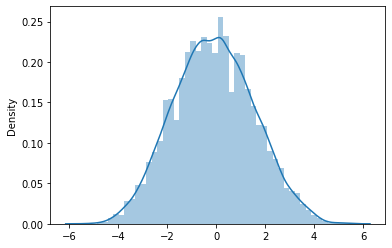

In [26]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.distplot((y_test_predict1.T - pred1))

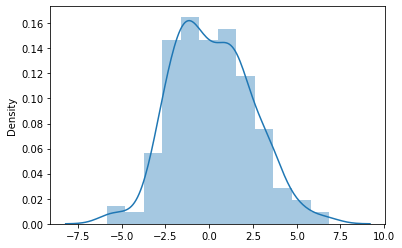

In [27]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot((y_test1 - pred1))

Ridge For SCIKIT LEARN AND ADMM IMPLEMENTATIONS GRAPH PLOT

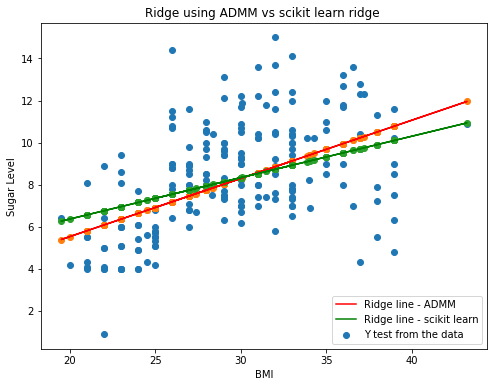

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.scatter(np.array(X_test1),np.array(y_test1) , label='Y test from the data')
plt.plot(np.array(X_test1),np.array(y_test_predict1),color = 'red',label='Ridge line - ADMM')
plt.scatter(np.array(X_test1),np.array(y_test_predict1))
plt.scatter(np.array(X_test1),np.array(pred1))
plt.plot(np.array(X_test1),np.array(pred1),color = 'green',label='Ridge line - scikit learn')
plt.title('Ridge using ADMM vs scikit learn ridge ')
plt.xlabel('BMI')
plt.ylabel('Sugar Level')
plt.legend()
plt.show()

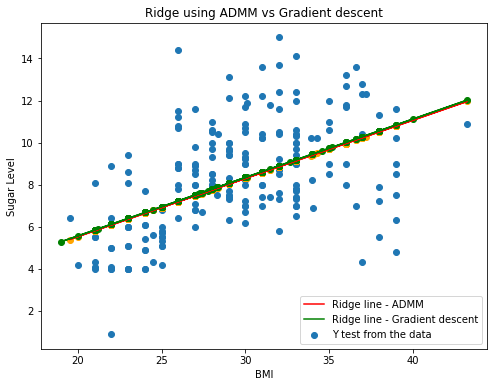

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.scatter(np.array(X_test1),np.array(y_test1) , label='Y test from the data')
plt.scatter(np.array(X_test1),np.array(y_test_predict1),color='orange')
plt.plot(np.array(X_test1),np.array(y_test_predict1),color = 'red',label='Ridge line - ADMM')
plt.scatter( X_test, Y_pred, color = 'green' )
plt.plot(np.array(X_test),np.array(Y_pred), color = 'green' ,label = 'Ridge line - Gradient descent')
plt.title('Ridge using ADMM vs Gradient descent')
plt.xlabel('BMI')
plt.ylabel('Sugar Level')
plt.legend()
plt.show()